In [11]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import accuracy_score
from sklearn.model_selection import LeaveOneOut

from sampler import sample_from_logreg

from sklearn.gaussian_process.kernels import RBF

import numpy as np
import matplotlib.pyplot as plt

from cv_svm import SVM_smooth
from kernel_svm import SVM_smooth_kernel

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
#X, y = load_breast_cancer(return_X_y=True)
#X, y = make_classification(n_samples=250, n_features=50)
X, _, y = sample_from_logreg(n=250, p=20, seed=120)
n = X.shape[0]
p = X.shape[1]
y[np.where(y == 0)] = -1

In [4]:
X_scaled = StandardScaler().fit_transform(X)
#X_scaled = X
print(X_scaled.shape)

(250, 20)


In [4]:
clf = SVC(kernel='linear')
clf.fit(X_scaled, y)
sk_coef_og = clf.coef_.flatten()
sk_coef = clf.coef_/np.linalg.norm(clf.coef_)
print(clf.coef_)
print(clf.intercept_)

[[ 1.44119178e+00 -2.29122060e-01 -4.73133921e-01 -5.71197691e-01
  -9.23568038e-02 -4.16302288e-01  2.29394113e-01 -2.91213658e-02
  -1.85803923e-01  1.53175947e-01  2.37632445e-01  1.26117844e-01
   1.51192806e-01 -1.06962035e-03  1.36621515e-02  4.48711746e-01
   1.74007771e+00  2.70215171e-02 -2.03117321e+00  3.15806682e-02]]
[-0.02560786]


In [5]:
y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

0.88

In [6]:
sigma = 1e-5
lbd = 1

In [7]:
# calculate maximum bound
from sklearn.metrics import pairwise_distances
m_max = np.min(pairwise_distances(X))**2
print(m_max)

C = np.linalg.norm(X.T @ X)/(n - 1)

max_bound = 1 + C/(lbd * sigma) *\
            1/(2 * np.sqrt(1 + (m_max/sigma)**2)**3)
print(max_bound)

# what lambda do we have to pick?
b = 200
lbd_pick = C/((b - 1) * sigma) *\
            1/(2 * np.sqrt(1 + (m_max/sigma)**2)**3)
lbd_pick

0.0
231284.8670604874


1162.2304877411427

In [8]:
#clf = SVM_smooth(sigma=sigma, lbd=lbd)
clf = SVM_smooth_kernel(sigma=sigma, lbd=lbd, kernel=RBF(3.5))
clf.fit(X_scaled, y, n_iter=2500, eta=0.5/n, approx_cv=True, cv=True, log_iacv=True, save_err_approx=True, save_err_cv=True)
#clf.fit(X_scaled, y, thresh=1e-7, n_iter=2500, eta=0.5/n,
#        approx_cv=True, cv=True, log_iter=True, log_iacv=True,
#        save_cond_nums=False, save_err_approx=True, save_err_cv=True,
#        warm_start=0, normalise=False, adjust_factor=True,
#        save_hessian_norms=True)

#print(f"grad {np.linalg.norm(clf.nabla_fgd_(clf.weights_, X_scaled, y, clf.sigma_, clf.lbd_))}")
#coef = clf.weights_/np.linalg.norm(clf.weights_)
#print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

coef = clf.u_/np.linalg.norm(clf.u_)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

y_pred = clf.predict(X_scaled)
accuracy_score(y, y_pred)

| IACV: 0.00000161 | baseline: 0.00003084
| IACV: 0.00000321 | baseline: 0.00005857
| IACV: 0.00000479 | baseline: 0.00008357
| IACV: 0.00000635 | baseline: 0.00010618
| IACV: 0.00000790 | baseline: 0.00012672
| IACV: 0.00000943 | baseline: 0.00014544
| IACV: 0.00001094 | baseline: 0.00016258
| IACV: 0.00001245 | baseline: 0.00017835
| IACV: 0.00001394 | baseline: 0.00019292
| IACV: 0.00001541 | baseline: 0.00020645
| IACV: 0.00001687 | baseline: 0.00021909
| IACV: 0.00001832 | baseline: 0.00023095
| IACV: 0.00001975 | baseline: 0.00024214
| IACV: 0.00002118 | baseline: 0.00025274
| IACV: 0.00002258 | baseline: 0.00026285
| IACV: 0.00002398 | baseline: 0.00027252
| IACV: 0.00002536 | baseline: 0.00028182
| IACV: 0.00002673 | baseline: 0.00029081
| IACV: 0.00002809 | baseline: 0.00029951
| IACV: 0.00002944 | baseline: 0.00030798
| IACV: 0.00003077 | baseline: 0.00031624
| IACV: 0.00003210 | baseline: 0.00032433
| IACV: 0.00003341 | baseline: 0.00033226
| IACV: 0.00003471 | baseline: 0.0

| IACV: 0.00015126 | baseline: 0.00118325
| IACV: 0.00015157 | baseline: 0.00118630
| IACV: 0.00015187 | baseline: 0.00118933
| IACV: 0.00015217 | baseline: 0.00119235
| IACV: 0.00015247 | baseline: 0.00119536
| IACV: 0.00015277 | baseline: 0.00119836
| IACV: 0.00015306 | baseline: 0.00120135
| IACV: 0.00015335 | baseline: 0.00120432
| IACV: 0.00015364 | baseline: 0.00120728
| IACV: 0.00015393 | baseline: 0.00121024
| IACV: 0.00015421 | baseline: 0.00121318
| IACV: 0.00015449 | baseline: 0.00121611
| IACV: 0.00015478 | baseline: 0.00121903
| IACV: 0.00015505 | baseline: 0.00122193
| IACV: 0.00015533 | baseline: 0.00122483
| IACV: 0.00015560 | baseline: 0.00122772
| IACV: 0.00015588 | baseline: 0.00123059
| IACV: 0.00015615 | baseline: 0.00123346
| IACV: 0.00015641 | baseline: 0.00123632
| IACV: 0.00015668 | baseline: 0.00123916
| IACV: 0.00015694 | baseline: 0.00124200
| IACV: 0.00015721 | baseline: 0.00124482
| IACV: 0.00015747 | baseline: 0.00124764
| IACV: 0.00015772 | baseline: 0.0

| IACV: 0.00018395 | baseline: 0.00164561
| IACV: 0.00018403 | baseline: 0.00164747
| IACV: 0.00018411 | baseline: 0.00164932
| IACV: 0.00018419 | baseline: 0.00165118
| IACV: 0.00018427 | baseline: 0.00165302
| IACV: 0.00018435 | baseline: 0.00165487
| IACV: 0.00018443 | baseline: 0.00165672
| IACV: 0.00018451 | baseline: 0.00165856
| IACV: 0.00018459 | baseline: 0.00166040
| IACV: 0.00018466 | baseline: 0.00166223
| IACV: 0.00018474 | baseline: 0.00166406
| IACV: 0.00018482 | baseline: 0.00166589
| IACV: 0.00018490 | baseline: 0.00166772
| IACV: 0.00018497 | baseline: 0.00166955
| IACV: 0.00018505 | baseline: 0.00167137
| IACV: 0.00018512 | baseline: 0.00167319
| IACV: 0.00018520 | baseline: 0.00167501
| IACV: 0.00018527 | baseline: 0.00167682
| IACV: 0.00018535 | baseline: 0.00167863
| IACV: 0.00018542 | baseline: 0.00168044
| IACV: 0.00018550 | baseline: 0.00168225
| IACV: 0.00018557 | baseline: 0.00168405
| IACV: 0.00018564 | baseline: 0.00168585
| IACV: 0.00018571 | baseline: 0.0

| IACV: 0.00019472 | baseline: 0.00196997
| IACV: 0.00019476 | baseline: 0.00197143
| IACV: 0.00019480 | baseline: 0.00197289
| IACV: 0.00019483 | baseline: 0.00197434
| IACV: 0.00019487 | baseline: 0.00197579
| IACV: 0.00019491 | baseline: 0.00197724
| IACV: 0.00019495 | baseline: 0.00197869
| IACV: 0.00019498 | baseline: 0.00198014
| IACV: 0.00019502 | baseline: 0.00198158
| IACV: 0.00019506 | baseline: 0.00198303
| IACV: 0.00019510 | baseline: 0.00198447
| IACV: 0.00019513 | baseline: 0.00198591
| IACV: 0.00019517 | baseline: 0.00198735
| IACV: 0.00019521 | baseline: 0.00198879
| IACV: 0.00019524 | baseline: 0.00199022
| IACV: 0.00019528 | baseline: 0.00199166
| IACV: 0.00019532 | baseline: 0.00199309
| IACV: 0.00019535 | baseline: 0.00199453
| IACV: 0.00019539 | baseline: 0.00199596
| IACV: 0.00019543 | baseline: 0.00199739
| IACV: 0.00019546 | baseline: 0.00199881
| IACV: 0.00019550 | baseline: 0.00200024
| IACV: 0.00019553 | baseline: 0.00200166
| IACV: 0.00019557 | baseline: 0.0

| IACV: 0.00020103 | baseline: 0.00223341
| IACV: 0.00020106 | baseline: 0.00223460
| IACV: 0.00020108 | baseline: 0.00223579
| IACV: 0.00020111 | baseline: 0.00223697
| IACV: 0.00020114 | baseline: 0.00223816
| IACV: 0.00020117 | baseline: 0.00223934
| IACV: 0.00020119 | baseline: 0.00224053
| IACV: 0.00020122 | baseline: 0.00224171
| IACV: 0.00020125 | baseline: 0.00224289
| IACV: 0.00020127 | baseline: 0.00224407
| IACV: 0.00020130 | baseline: 0.00224525
| IACV: 0.00020133 | baseline: 0.00224643
| IACV: 0.00020135 | baseline: 0.00224760
| IACV: 0.00020138 | baseline: 0.00224878
| IACV: 0.00020141 | baseline: 0.00224995
| IACV: 0.00020143 | baseline: 0.00225112
| IACV: 0.00020146 | baseline: 0.00225230
| IACV: 0.00020149 | baseline: 0.00225347
| IACV: 0.00020151 | baseline: 0.00225464
| IACV: 0.00020154 | baseline: 0.00225580
| IACV: 0.00020157 | baseline: 0.00225697
| IACV: 0.00020159 | baseline: 0.00225814
| IACV: 0.00020162 | baseline: 0.00225930
| IACV: 0.00020165 | baseline: 0.0

| IACV: 0.00020594 | baseline: 0.00244779
| IACV: 0.00020596 | baseline: 0.00244878
| IACV: 0.00020598 | baseline: 0.00244976
| IACV: 0.00020601 | baseline: 0.00245074
| IACV: 0.00020603 | baseline: 0.00245172
| IACV: 0.00020605 | baseline: 0.00245270
| IACV: 0.00020607 | baseline: 0.00245368
| IACV: 0.00020610 | baseline: 0.00245466
| IACV: 0.00020612 | baseline: 0.00245564
| IACV: 0.00020614 | baseline: 0.00245661
| IACV: 0.00020617 | baseline: 0.00245759
| IACV: 0.00020619 | baseline: 0.00245856
| IACV: 0.00020621 | baseline: 0.00245953
| IACV: 0.00020623 | baseline: 0.00246051
| IACV: 0.00020626 | baseline: 0.00246148
| IACV: 0.00020628 | baseline: 0.00246245
| IACV: 0.00020630 | baseline: 0.00246342
| IACV: 0.00020632 | baseline: 0.00246439
| IACV: 0.00020635 | baseline: 0.00246535
| IACV: 0.00020637 | baseline: 0.00246632
| IACV: 0.00020639 | baseline: 0.00246729
| IACV: 0.00020641 | baseline: 0.00246825
| IACV: 0.00020644 | baseline: 0.00246922
| IACV: 0.00020646 | baseline: 0.0

| IACV: 0.00021012 | baseline: 0.00262416
| IACV: 0.00021014 | baseline: 0.00262498
| IACV: 0.00021016 | baseline: 0.00262580
| IACV: 0.00021018 | baseline: 0.00262662
| IACV: 0.00021020 | baseline: 0.00262744
| IACV: 0.00021022 | baseline: 0.00262826
| IACV: 0.00021024 | baseline: 0.00262908
| IACV: 0.00021026 | baseline: 0.00262990
| IACV: 0.00021028 | baseline: 0.00263071
| IACV: 0.00021030 | baseline: 0.00263153
| IACV: 0.00021032 | baseline: 0.00263234
| IACV: 0.00021034 | baseline: 0.00263316
| IACV: 0.00021036 | baseline: 0.00263397
| IACV: 0.00021038 | baseline: 0.00263478
| IACV: 0.00021040 | baseline: 0.00263560
| IACV: 0.00021042 | baseline: 0.00263641
| IACV: 0.00021044 | baseline: 0.00263722
| IACV: 0.00021046 | baseline: 0.00263803
| IACV: 0.00021048 | baseline: 0.00263884
| IACV: 0.00021050 | baseline: 0.00263965
| IACV: 0.00021052 | baseline: 0.00264045
| IACV: 0.00021054 | baseline: 0.00264126
| IACV: 0.00021056 | baseline: 0.00264207
| IACV: 0.00021058 | baseline: 0.0

| IACV: 0.00021380 | baseline: 0.00277213
| IACV: 0.00021381 | baseline: 0.00277283
| IACV: 0.00021383 | baseline: 0.00277352
| IACV: 0.00021385 | baseline: 0.00277421
| IACV: 0.00021387 | baseline: 0.00277490
| IACV: 0.00021388 | baseline: 0.00277559
| IACV: 0.00021390 | baseline: 0.00277628
| IACV: 0.00021392 | baseline: 0.00277697
| IACV: 0.00021394 | baseline: 0.00277766
| IACV: 0.00021395 | baseline: 0.00277835
| IACV: 0.00021397 | baseline: 0.00277903
| IACV: 0.00021399 | baseline: 0.00277972
| IACV: 0.00021401 | baseline: 0.00278041
| IACV: 0.00021402 | baseline: 0.00278109
| IACV: 0.00021404 | baseline: 0.00278178
| IACV: 0.00021406 | baseline: 0.00278246
| IACV: 0.00021408 | baseline: 0.00278314
| IACV: 0.00021409 | baseline: 0.00278383
| IACV: 0.00021411 | baseline: 0.00278451
| IACV: 0.00021413 | baseline: 0.00278519
| IACV: 0.00021415 | baseline: 0.00278587
| IACV: 0.00021416 | baseline: 0.00278655
| IACV: 0.00021418 | baseline: 0.00278723
| IACV: 0.00021420 | baseline: 0.0

| IACV: 0.00021708 | baseline: 0.00289859
| IACV: 0.00021709 | baseline: 0.00289918
| IACV: 0.00021711 | baseline: 0.00289977
| IACV: 0.00021712 | baseline: 0.00290035
| IACV: 0.00021714 | baseline: 0.00290094
| IACV: 0.00021716 | baseline: 0.00290153
| IACV: 0.00021717 | baseline: 0.00290211
| IACV: 0.00021719 | baseline: 0.00290270
| IACV: 0.00021720 | baseline: 0.00290328
| IACV: 0.00021722 | baseline: 0.00290387
| IACV: 0.00021723 | baseline: 0.00290445
| IACV: 0.00021725 | baseline: 0.00290503
| IACV: 0.00021726 | baseline: 0.00290562
| IACV: 0.00021728 | baseline: 0.00290620
| IACV: 0.00021729 | baseline: 0.00290678
| IACV: 0.00021731 | baseline: 0.00290736
| IACV: 0.00021733 | baseline: 0.00290794
| IACV: 0.00021734 | baseline: 0.00290852
| IACV: 0.00021736 | baseline: 0.00290910
| IACV: 0.00021737 | baseline: 0.00290968
| IACV: 0.00021739 | baseline: 0.00291026
| IACV: 0.00021740 | baseline: 0.00291084
| IACV: 0.00021742 | baseline: 0.00291142
| IACV: 0.00021743 | baseline: 0.0

| IACV: 0.00021997 | baseline: 0.00300595
| IACV: 0.00021998 | baseline: 0.00300646
| IACV: 0.00022000 | baseline: 0.00300696
| IACV: 0.00022001 | baseline: 0.00300747
| IACV: 0.00022003 | baseline: 0.00300797
| IACV: 0.00022004 | baseline: 0.00300847
| IACV: 0.00022005 | baseline: 0.00300897
| IACV: 0.00022007 | baseline: 0.00300948
| IACV: 0.00022008 | baseline: 0.00300998
| IACV: 0.00022010 | baseline: 0.00301048
| IACV: 0.00022011 | baseline: 0.00301098
| IACV: 0.00022012 | baseline: 0.00301148
| IACV: 0.00022014 | baseline: 0.00301198
| IACV: 0.00022015 | baseline: 0.00301248
| IACV: 0.00022016 | baseline: 0.00301298
| IACV: 0.00022018 | baseline: 0.00301348
| IACV: 0.00022019 | baseline: 0.00301398
| IACV: 0.00022020 | baseline: 0.00301448
| IACV: 0.00022022 | baseline: 0.00301497
| IACV: 0.00022023 | baseline: 0.00301547
| IACV: 0.00022025 | baseline: 0.00301597
| IACV: 0.00022026 | baseline: 0.00301647
| IACV: 0.00022027 | baseline: 0.00301696
| IACV: 0.00022029 | baseline: 0.0

| IACV: 0.00022257 | baseline: 0.00309928
| IACV: 0.00022258 | baseline: 0.00309972
| IACV: 0.00022260 | baseline: 0.00310015
| IACV: 0.00022261 | baseline: 0.00310059
| IACV: 0.00022262 | baseline: 0.00310102
| IACV: 0.00022263 | baseline: 0.00310146
| IACV: 0.00022264 | baseline: 0.00310189
| IACV: 0.00022266 | baseline: 0.00310232
| IACV: 0.00022267 | baseline: 0.00310276
| IACV: 0.00022268 | baseline: 0.00310319
| IACV: 0.00022269 | baseline: 0.00310362
| IACV: 0.00022271 | baseline: 0.00310406
| IACV: 0.00022272 | baseline: 0.00310449
| IACV: 0.00022273 | baseline: 0.00310492
| IACV: 0.00022274 | baseline: 0.00310535
| IACV: 0.00022275 | baseline: 0.00310578
| IACV: 0.00022277 | baseline: 0.00310621
| IACV: 0.00022278 | baseline: 0.00310664
| IACV: 0.00022279 | baseline: 0.00310707
| IACV: 0.00022280 | baseline: 0.00310750
| IACV: 0.00022282 | baseline: 0.00310793
| IACV: 0.00022283 | baseline: 0.00310836
| IACV: 0.00022284 | baseline: 0.00310879
| IACV: 0.00022285 | baseline: 0.0

| IACV: 0.00022487 | baseline: 0.00317943
| IACV: 0.00022488 | baseline: 0.00317981
| IACV: 0.00022489 | baseline: 0.00318019
| IACV: 0.00022490 | baseline: 0.00318057
| IACV: 0.00022491 | baseline: 0.00318095
| IACV: 0.00022492 | baseline: 0.00318133
| IACV: 0.00022494 | baseline: 0.00318171
| IACV: 0.00022495 | baseline: 0.00318208
| IACV: 0.00022496 | baseline: 0.00318246
| IACV: 0.00022497 | baseline: 0.00318284
| IACV: 0.00022498 | baseline: 0.00318322
| IACV: 0.00022499 | baseline: 0.00318359
| IACV: 0.00022500 | baseline: 0.00318397
| IACV: 0.00022501 | baseline: 0.00318435
| IACV: 0.00022502 | baseline: 0.00318472
| IACV: 0.00022503 | baseline: 0.00318510
| IACV: 0.00022505 | baseline: 0.00318548
| IACV: 0.00022506 | baseline: 0.00318585
| IACV: 0.00022507 | baseline: 0.00318623
| IACV: 0.00022508 | baseline: 0.00318660
| IACV: 0.00022509 | baseline: 0.00318698
| IACV: 0.00022510 | baseline: 0.00318735
| IACV: 0.00022511 | baseline: 0.00318773
| IACV: 0.00022512 | baseline: 0.0

| IACV: 0.00022696 | baseline: 0.00325053
| IACV: 0.00022697 | baseline: 0.00325087
| IACV: 0.00022698 | baseline: 0.00325120
| IACV: 0.00022699 | baseline: 0.00325153
| IACV: 0.00022700 | baseline: 0.00325186
| IACV: 0.00022701 | baseline: 0.00325219
| IACV: 0.00022702 | baseline: 0.00325253
| IACV: 0.00022703 | baseline: 0.00325286
| IACV: 0.00022704 | baseline: 0.00325319
| IACV: 0.00022705 | baseline: 0.00325352
| IACV: 0.00022706 | baseline: 0.00325385
| IACV: 0.00022707 | baseline: 0.00325418
| IACV: 0.00022708 | baseline: 0.00325451
| IACV: 0.00022709 | baseline: 0.00325484
| IACV: 0.00022710 | baseline: 0.00325517
| IACV: 0.00022711 | baseline: 0.00325550
| IACV: 0.00022712 | baseline: 0.00325583
| IACV: 0.00022713 | baseline: 0.00325616
| IACV: 0.00022714 | baseline: 0.00325649
| IACV: 0.00022715 | baseline: 0.00325682
| IACV: 0.00022716 | baseline: 0.00325714
| IACV: 0.00022717 | baseline: 0.00325747
| IACV: 0.00022718 | baseline: 0.00325780
| IACV: 0.00022719 | baseline: 0.0

ValueError: operands could not be broadcast together with shapes (250,) (1,20) 

In [ ]:
iacv_coef = normalize(clf.loo_iacv_, axis=1)
true_coef = normalize(clf.loo_true_, axis=1)
print(np.mean(np.linalg.norm(iacv_coef - true_coef, 2, axis=1)))
print(np.mean(np.linalg.norm(coef - true_coef, 2, axis=1)))

In [ ]:
print(np.std(clf.loo_iacv_))
print(np.std(clf.loo_true_))

In [ ]:
print(np.mean(clf.loo_iacv_, axis=0))
print(np.mean(clf.loo_true_, axis=0))

In [ ]:
print("percentage difference between IACV and true CV mean")
print(np.abs(np.mean(clf.loo_iacv_, axis=0) - np.mean(clf.loo_true_, axis=0)).sum()/(np.mean(clf.loo_true_, axis=0)).sum())
print("percentage difference between w_hat and true CV mean")
print(np.abs(clf.weights_ - np.mean(clf.loo_true_, axis=0)).sum()/(np.mean(clf.loo_true_, axis=0)).sum())

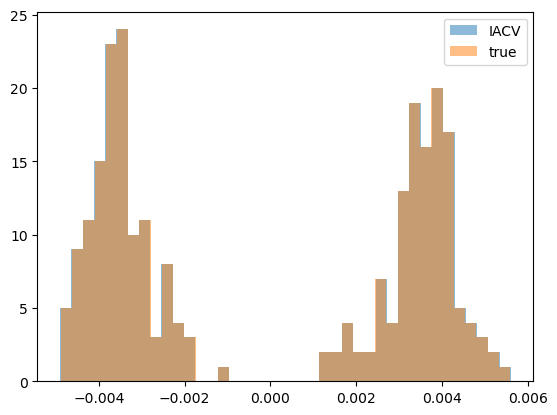

In [10]:
plt.hist(np.mean(clf.approx_cv_obj.iterates, axis=0), alpha=0.5, bins=40, label="IACV")
plt.hist(np.mean(clf.true_cv_obj.iterates, axis=0), alpha=0.5, bins=40, label="true")
plt.legend()

In [ ]:
plt.hist(np.linalg.norm(clf.loo_iacv_ - clf.loo_true_, axis=1), bins=60, label="diffs")
plt.legend()

In [ ]:
plt.hist(np.linalg.norm(clf.weights_ - clf.loo_true_, axis=1), bins=60, label="diffs")
plt.show()

In [ ]:
clf.loo_iacv_

In [ ]:
clf.loo_true_

In [ ]:
iacv_mean = np.mean(clf.loo_iacv_, axis=0)
coef = iacv_mean/np.linalg.norm(iacv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

In [ ]:
true_cv_mean = np.mean(clf.loo_true_, axis=0)
coef = true_cv_mean/np.linalg.norm(true_cv_mean)
print(f"diff {np.mean(np.abs(coef - sk_coef))} | pct {np.mean(np.abs(coef - sk_coef))/np.sum(np.abs(coef))}")

In [ ]:
coef = clf.weights_/np.linalg.norm(clf.weights_)
nbin = 100
plt.hist(coef, bins=nbin, label="FGD", alpha=0.3)
plt.hist(sk_coef.flatten(), bins=nbin, label="sklearn", alpha=0.3)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.min(clf.cond_nums_, axis=1), label="Min Condition Number", c='b')
ax.plot(np.max(clf.cond_nums_, axis=1), label="Max Condition Number", c='r')
ax.plot(np.mean(clf.cond_nums_, axis=1), label="Mean Condition Number", c='purple')
ax.plot(clf.cond_num_bound_, label="Bound", c="black", linestyle="--")

#ax.set_yscale('log')
ax.set_xlabel("Iterations")
ax.set_ylabel("Condition No.")
ws = 1.95 # 1.75
hs = 1.85 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
#fig.legend()
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
plt.show()
plt.savefig('svm_conv_bound_cond_no.pgf', bbox_inches='tight', pad_inches=0)

In [ ]:
fig, ax = plt.subplots()
hess_norms = np.asarray(clf.hess_norms_)
ax.plot(hess_norms[:, 0], label="Full Hessian")
ax.plot(hess_norms[:, 1], label="Per-Sample Hessian", alpha=0.3)

#ax.set_yscale('log')
ax.set_xlabel("Iterations")
ax.set_ylabel("Norm")
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
fig.legend()
plt.show()

In [ ]:
np.mean(clf.cond_nums_, axis=1)[np.argmax(np.mean(clf.cond_nums_, axis=1))]

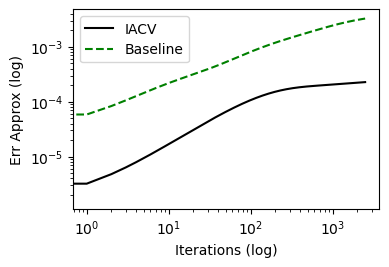

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots()
ax.plot(clf.err_approx_["IACV"], label="IACV", c='black')
#ax.plot(clf.err_approx_["NS"], label="NS", c='red', linestyle="--")
ax.plot(clf.err_approx_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err Approx (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_err_approx_mod.pgf', bbox_inches='tight', pad_inches=0)

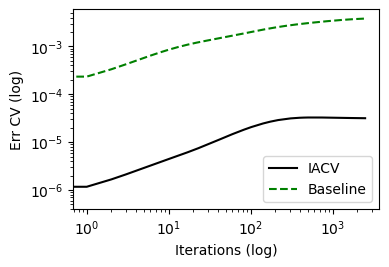

<Figure size 640x480 with 0 Axes>

In [15]:
fig, ax = plt.subplots()
ax.plot(clf.err_cv_["IACV"], label="IACV", c='black')
ax.plot(clf.err_cv_["baseline"], label="Baseline", c='green', linestyle="--")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Iterations (log)")
ax.set_ylabel("Err CV (log)")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('svm_convergence_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

In [21]:
# test different sigma values
import time
#sigmas = [2e-30, 2e-25, 2e-15, 2e-10, 2e-5, 2e-1]
#sigmas = [2e-15, 2e-10, 2e-5, 2e-3, 2e-1, 5e-1, 7e-1, 8e-1, 1, 1.25, 1.5, 2]
sigmas = [2e-15, 2e-12, 2e-10, 2e-8, 2e-5, 2e-3, 2e-1, 5e-1, 8e-1, 1]
last_err_approx = np.empty((len(sigmas), 2))
last_err_cv = np.empty((len(sigmas), 2))
cond_nums = np.empty(len(sigmas))

start = time.time()
for i, s in enumerate(sigmas):
    if s == 0:
        continue
    #clf = SVM_smooth(sigma=s, lbd=1)
    clf = SVM_smooth_kernel(sigma=s, lbd=1, kernel=RBF(2.5))
    print(f"running experiment for sigma = {s}")
    clf.fit(X_scaled, y, n_iter=1000, eta=0.5/n, approx_cv=True, cv=True, log_iacv=False, log_iter=False,
           save_err_cv=True, save_err_approx=True)
    y_pred = clf.predict(X_scaled)
    score = accuracy_score(y, y_pred)
    print(f"\tsigma {s} | score {score}")
    #print(clf.weights_)
    print(f"\tErr_Approx IACV: {clf.err_approx_['IACV'][-1]} | baseline: {clf.err_approx_['baseline'][-1]}" )
    print(f"\tErr_CV     IACV: {clf.err_cv_['IACV'][-1]} | baseline: {clf.err_cv_['baseline'][-1]}" )
    last_err_approx[i] = [clf.err_approx_["IACV"][-1], clf.err_approx_["baseline"][-1]]
    last_err_cv[i] = [clf.err_cv_["IACV"][-1], clf.err_cv_["baseline"][-1]]
    #cond_nums[i] = np.mean(clf.cond_nums_)

end = time.time()
print(end - start)

running experiment for sigma = 2e-15
	sigma 2e-15 | score 0.944
	Err_Approx IACV: 0.00022158515639603138 | baseline: 0.0031121764583012953
	Err_CV     IACV: 1.780200000212062e-05 | baseline: 0.003420528257265687
running experiment for sigma = 2e-12
	sigma 2e-12 | score 0.944
	Err_Approx IACV: 0.00022158515639603138 | baseline: 0.0031121764583012953
	Err_CV     IACV: 1.7801523426896892e-05 | baseline: 0.0034205284900963306
running experiment for sigma = 2e-10
	sigma 2e-10 | score 0.944
	Err_Approx IACV: 0.00022158515639603138 | baseline: 0.0031121764583012953
	Err_CV     IACV: 1.7801523426896892e-05 | baseline: 0.0034205287229269743
running experiment for sigma = 2e-08
	sigma 2e-08 | score 0.944
	Err_Approx IACV: 0.00022158515639603138 | baseline: 0.0031121764583012953
	Err_CV     IACV: 1.780295315256808e-05 | baseline: 0.0034205280244350433
running experiment for sigma = 2e-05
	sigma 2e-05 | score 0.944
	Err_Approx IACV: 0.00022158515639603138 | baseline: 0.0031121764579856936
	Err_CV 

In [22]:
last_err_cv = np.asarray(last_err_cv)
last_err_approx = np.asarray(last_err_approx)

last_err_cv = np.nan_to_num(last_err_cv, nan=1e2)
last_err_approx = np.nan_to_num(last_err_approx, nan=1e2)

last_err_cv = np.clip(last_err_cv, 0, 1e2)
last_err_approx = np.clip(last_err_approx, 0, 1e2)

In [23]:
fig, ax = plt.subplots()
ax.plot(sigmas, last_err_approx[:, 0], label="IACV", c='black')
ax.plot(sigmas, last_err_approx[:, 1], label="Baseline", c='green', linestyle="--")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("$\log(\sigma)$")
ax.set_ylabel("Err Approx")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svmtest_sigma_err_approx_mod.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_6264/3076286034.py:12: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [24]:
fig, ax = plt.subplots()
ax.plot(sigmas, last_err_cv[:, 0], label="IACV", c='black')
ax.plot(sigmas, last_err_cv[:, 1], label="Baseline", c='green', linestyle="--")
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("$\log(\sigma)$")
ax.set_ylabel("Err CV")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svmtest_sigma_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_6264/3921100611.py:12: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [25]:
fig, ax = plt.subplots()
ax.plot(sigmas, cond_nums)
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel("$\log(\sigma)$")
ax.set_ylabel("Condition Number")
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('svmtest_sigma_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_6264/419037292.py:10: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [15]:
# test different lambda values
import time
lambdas = np.linspace(0, 2.5, 12)
last_err_approx = []
last_err_cv = []
condition_nos = []
iacv_iterates = []
true_iterates = []

start = time.time()
for l in lambdas:
    #clf = SVM_smooth(sigma=0.25, lbd=l)
    clf = SVM_smooth_kernel(sigma=0.25, lbd=l, kernel=RBF(2.5))
    #clf.fit(X, y, thresh=5e-3, n_iter=1000, eta=0.5 * s, cv=False, approx_cv=True, log_iacv=False, log_iter=True)
    print(f"running experiment for lambda = {l}")
    #clf.fit(X_scaled, y, thresh=1e-3, n_iter=2000, eta=0.5/n, approx_cv=True, cv=True,
    #        save_err_approx=True, save_err_cv=True, save_cond_nums=True,
    #        log_iacv=False, log_iter=False, normalise=False, adjust_factor=True)
    clf.fit(X_scaled, y, n_iter=1000, eta=0.5/n, approx_cv=True, cv=True,
            save_err_approx=True, save_err_cv=True, log_iacv=False, log_iter=False)
    y_pred = clf.predict(X_scaled)
    score = accuracy_score(y, y_pred)
    
    #condition_nos.append(clf.cond_nums_)
    iacv_iterates.append(clf.approx_cv_obj.iterates)
    true_iterates.append(clf.true_cv_obj.iterates)

    #coef = clf.weights_/np.linalg.norm(clf.weights_)

    #print(clf.weights_)
    #print(f"\tlambda {l} | score {score} | grad {np.linalg.norm(clf.nabla_fgd_(clf.weights_, X_scaled, y, clf.sigma_, clf.lbd_))} | sklearn diff {np.mean(np.abs(coef- sk_coef))}")
    print(f"\tlambda {l} | score {score}")
    print(f"\tIACV: {clf.err_approx_['IACV'][-1]} | baseline: {clf.err_approx_['baseline'][-1]}" )
    last_err_approx.append([clf.err_approx_["IACV"][-1], clf.err_approx_["baseline"][-1]])
    last_err_cv.append([clf.err_cv_["IACV"][-1], clf.err_cv_["baseline"][-1]])

end = time.time()
print(end - start)

running experiment for lambda = 0.0
	lambda 0.0 | score 0.644
	IACV: 0.0014491251204162836 | baseline: 0.012404704660279115
running experiment for lambda = 0.22727272727272727
	lambda 0.22727272727272727 | score 0.892
	IACV: 0.0005983572918921709 | baseline: 0.00619470611073431
running experiment for lambda = 0.45454545454545453
	lambda 0.45454545454545453 | score 0.928
	IACV: 0.00040049964445643127 | baseline: 0.004724767678801998
running experiment for lambda = 0.6818181818181818
	lambda 0.6818181818181818 | score 0.94
	IACV: 0.000297499296721071 | baseline: 0.0038544926551525734
running experiment for lambda = 0.9090909090909091
	lambda 0.9090909090909091 | score 0.94
	IACV: 0.0002362749946769327 | baseline: 0.0032568325368142774
running experiment for lambda = 1.1363636363636362
	lambda 1.1363636363636362 | score 0.944
	IACV: 0.00019607931608334184 | baseline: 0.0028143298021294054
running experiment for lambda = 1.3636363636363635
	lambda 1.3636363636363635 | score 0.952
	IACV: 0.

In [16]:
last_err_approx = np.asarray(last_err_approx)
last_err_cv = np.asarray(last_err_cv)
condition_nos = np.asarray(condition_nos)
iacv_iterates = np.asarray(iacv_iterates)
true_iterates = np.asarray(true_iterates)

In [20]:
fig, ax = plt.subplots()
ax.plot(lambdas, last_err_approx[:, 0], label="IACV", c='black')
ax.plot(lambdas, last_err_approx[:, 1], label="Baseline", c='green', linestyle="--")
#ax.set_yscale('log')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Err Approx")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svmtest_lambda_err_approx_mod.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_6264/2843042799.py:11: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


In [19]:
fig, ax = plt.subplots()
ax.plot(lambdas, last_err_cv[:, 0], label="IACV", c='black')
ax.plot(lambdas, last_err_cv[:, 1], label="Baseline", c='green', linestyle="--")
#ax.set_yscale('log')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Err CV")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
plt.savefig('kernel_svmtest_lambda_err_cv_mod.pgf', bbox_inches='tight', pad_inches=0)

/tmp/ipykernel_6264/1403229446.py:11: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()


## fig, ax = plt.subplots()
start = 0
ax.plot(lambdas[start:], iacv_means[start:], label="IACV")
ax.plot(lambdas[start:], true_means[start:], label="true", linestyle="--")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Mean of CV Iterates")
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.show()
#plt.savefig('svmtest_lambda_coef_mod.pgf', bbox_inches='tight', pad_inches=0)